In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud
from collections import Counter

In [2]:
df = pd.read_csv('data/cleaned_csv/data_20201230_224551_cleaned.csv')

In [3]:
df.describe()

,view,channel_sub,view_to_sub,like,dislike,comment,length,title_length,any_capitalized_word,all_capitalized_word,length=10m+,length=15m+,length=1m-,length=5m-
count,7.410000e+02,7.410000e+02,741.000000,7.370000e+02,737.000000,728.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000
mean,2.648004e+05,7.647987e+05,1.642812,1.499693e+04,404.390773,1421.309066,1150.279352,47.421053,0.758435,0.055331,0.511471,0.317139,0.055331,0.248313
std,1.294341e+06,3.293268e+06,17.178627,9.156175e+04,2716.351649,7563.769656,1891.440290,18.808014,0.428321,0.228779,0.500206,0.465676,0.228779,0.432326
min,1.000000e+01,1.020000e+03,0.001582,0.000000e+00,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.650000e+03,1.030000e+04,0.053919,7.500000e+01,2.000000,15.000000,302.000000,34.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.236000e+03,6.590000e+04,0.172743,4.510000e+02,11.000000,67.000000,607.000000,46.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,7.389600e+04,3.830000e+05,0.511587,3.674000e+03,72.000000,393.000000,1106.000000,59.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,2.397790e+07,7.030000e+07,438.839535,1.927415e+06,54022.000000,130662.000000,21272.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.drop(['like', 'dislike', 'comment'], axis=1).corr()['channel_subZ']

view                    0.388995
channel_sub             1.000000
view_to_sub            -0.017552
length                 -0.009492
caption                 0.015679
title_length           -0.002080
any_capitalized_word    0.021365
all_capitalized_word    0.181814
length=10m+             0.019180
length=15m+            -0.017048
length=1m-             -0.035415
length=5m-             -0.011781
Name: channel_sub, dtype: float64

## Best Videos

In [5]:
df.sort_values('view_to_sub', ascending=False).head(10)

,Unnamed: 0,title,view,channel_sub,view_to_sub,like,dislike,comment,length,description,...,topic_categories,default_language,hour_published,title_length,any_capitalized_word,all_capitalized_word,length=10m+,length=15m+,length=1m-,length=5m-
269,ZrBTW8crU3I,Is the Norwegian Prison System Crazy?,943505,2150,438.839535,9746.0,1075.0,4871.0,411,Our She Thinks Girls get acquainted with just ...,...,NaN,NaN,3-5,37,0.0,0,0,0,0,0
675,cVCW5t_8VhE,Seven Summers - Youngblood,141839,1360,104.293382,809.0,9.0,175.0,251,www.myspace.com/sevensummersband,...,"['https://en.wikipedia.org/wiki/Rock_music', '...",NaN,12-14,26,1.0,0,0,0,0,1
710,e27TUmMkOA0,QWOP AI Runs 100m,203335,2430,83.676955,1485.0,430.0,226.0,730,I made a reinforcement learning AI that learns...,...,NaN,NaN,3-5,17,1.0,0,1,0,0,0
559,aniQ5mTo8M0,Building a water wheel Ep 8 - Assembling the...,673375,11800,57.065678,4659.0,261.0,525.0,400,This is a record of the homemade overshot alum...,...,"['https://en.wikipedia.org/wiki/Vehicle', 'htt...",NaN,21-23,52,1.0,0,0,0,0,0
213,s7pI0cHJQtY,Making Tension Based Furniture - Robby Cuthber...,1265467,23100,54.782121,39173.0,676.0,1522.0,667,Designer Robby Cuthbert discusses the ideas an...,...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,NaN,15-17,54,1.0,0,1,0,0,0
170,W8rwgWvNE78,CHARLY JORDAN CRUSHES DAISY KEECH in Women's 1...,2398213,77500,30.944684,24322.0,545.0,837.0,170,"Charly Jordan once again leading the pack, thi...",...,['https://en.wikipedia.org/wiki/Sport'],NaN,3-5,57,1.0,0,0,0,0,1
511,Cp5PS7qp5f0,My Restaurant! Official Trailer,863755,40000,21.593875,13060.0,862.0,4019.0,31,Play Now - https://play-restaurant.com \n\nOur...,...,['https://en.wikipedia.org/wiki/Video_game_cul...,NaN,18-20,31,0.0,0,0,0,1,1
602,OhA2xNjFtvU,2D/3D/4D ULTRASOUND 15 weeks 4 days with GENDE...,25021,1180,21.204237,95.0,3.0,26.0,526,It has been a little quiet on our channel but ...,...,['https://en.wikipedia.org/wiki/Knowledge'],en,0-2,77,1.0,0,0,0,0,0
14,WAOkXN7aXxg,Admitting When I'm Wrong.,1440483,73500,19.598408,45783.0,54022.0,29729.0,285,Thank you for hearing me out. I made a mistake...,...,['https://en.wikipedia.org/wiki/Entertainment'],NaN,21-23,25,0.0,0,0,0,0,1
137,bTRy9etXnfs,Ares 3: Chem Cam,526203,27700,18.996498,4226.0,33.0,239.0,144,Astronaut Mark Watney continues with research ...,...,['https://en.wikipedia.org/wiki/Entertainment'...,NaN,18-20,16,1.0,0,0,0,0,1


## Most Common Word in Title

In [6]:
title_words = list(df['title'].apply(lambda x: x.split()))
title_words = [x for words in title_words for x in words]
Counter(title_words).most_common(30)

[('|', 149),
 ('-', 125),
 ('The', 76),
 ('a', 64),
 ('the', 62),
 ('to', 52),
 ('and', 49),
 ('&', 47),
 ('of', 47),
 ('in', 45),
 ('with', 42),
 ('How', 39),
 ('for', 38),
 ('I', 37),
 ('A', 36),
 ('My', 28),
 ('2020', 22),
 ('Christmas', 21),
 ('on', 17),
 ('is', 16),
 ('To', 16),
 ('my', 16),
 ('ASMR', 16),
 ('With', 15),
 ('Why', 14),
 ('5', 14),
 ('from', 14),
 ('Is', 13),
 ('at', 13),
 ('2', 13)]

In [7]:
wc = WordCloud(width=1000, height=1000,
               font_path = 'font/aBigDeal.otf',
              collocations=False, background_color='white',
              colormap='tab10').generate(" ".join(title_words))

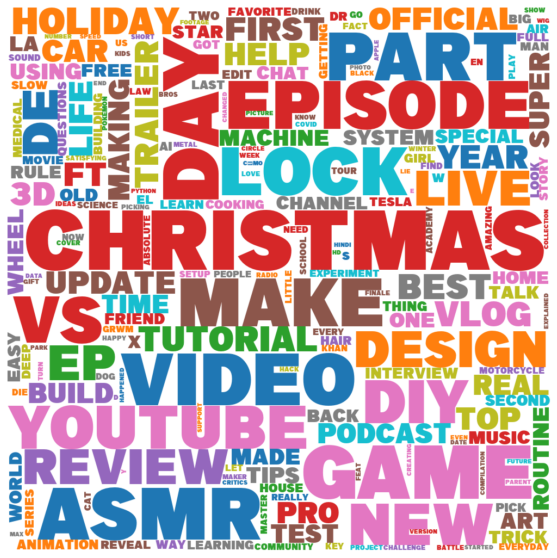

In [8]:
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

## Length of Video

In [9]:
# data = go.Histogram(x=df['length'].apply(lambda x: x/60),
#                     name='Length of Videos')

# go.Figure(data)

In [16]:
# px.scatter(x=df['channel_sub'] * df['view'], y=df['channel_sub'],
#           labels={'x': 'sub * view', 'y': 'sub'})